# Chapter 1: 数据操作

In [1]:
import torch

In [2]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [5]:
print(x.shape, x.numel())

torch.Size([12]) 12


In [6]:
X = x.reshape(3, 4)

In [7]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [8]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y  # **运算符是求幂运算

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [13]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [23]:
X < Y

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [16]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## 节省内存

In [20]:
before = id(Y)
Y += X              # Y[:] = X + Y
id(Y) == before

True

In [21]:
before = id(Y)
Y = X + Y
id(Y) == before

False

# Chapter 2 数据预处理

In [1]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [2]:
# 如果没有安装pandas，只需取消对以下行的注释来安装pandas
# !pip install pandas
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [9]:
# 处理缺失值
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs.iloc[:, 0] = inputs.iloc[:, 0].fillna(inputs.iloc[:, 0].mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [10]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0        True      False
1       2.0       False       True
2       4.0       False       True
3       3.0       False       True


In [13]:
import torch
## 转换成张量
X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

# Chapter 3 线性代数

In [16]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [18]:
y = torch.ones(4, dtype = torch.float32)
x = y + 1
x, y, torch.dot(x, y)

(tensor([2., 2., 2., 2.]), tensor([1., 1., 1., 1.]), tensor(8.))

In [21]:
torch.mv(A, x)

tensor([ 12.,  44.,  76., 108., 140.])

In [23]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

# Chapter 4 微积分

In [6]:
import numpy as np
import dl_use as dl

In [7]:
def f(x):
    return 3 * x ** 2 - 4 * x

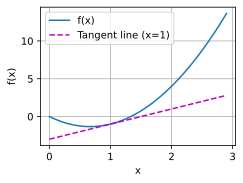

In [8]:
x = np.arange(0, 3, 0.1)
dl.plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

# Chapter 5 自动微分

## 5.1 例子 反向传播

In [1]:
import torch

x = torch.arange(4.0)
x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)
x.grad, x

(None, tensor([0., 1., 2., 3.], requires_grad=True))

In [2]:
y = 2 * torch.dot(x, x)
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [3]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [4]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [5]:
y

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)

## 5.2 分离计算

In [31]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u, x.grad

(tensor([True, True, True, True]), tensor([0., 1., 4., 9.]))

In [6]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [9]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()
a.grad == d / a

tensor(True)

In [10]:
a.grad

tensor(4096.)

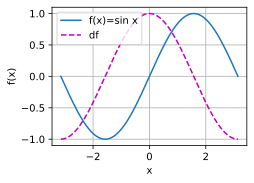

In [46]:
import numpy as np
import dl_use as dl

def f(x):
    return torch.sin(x)

x = torch.linspace(-1 * np.pi, 1 * np.pi, steps=1000, requires_grad=True)
y = f(x)
y.sum().backward()

x_np = x.detach().numpy()
y_np = y.detach().numpy()
grad_np = x.grad.numpy()

dl.plot(x_np, [y_np, grad_np], 'x', 'f(x)', legend=['f(x)=sin x', 'df'])

# Chapter 6 概率

In [47]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

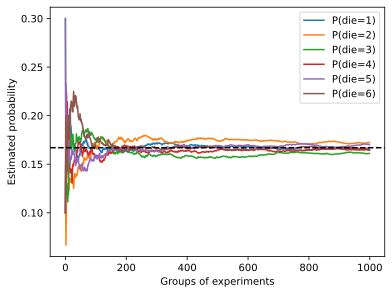

In [63]:
fair_probs = torch.ones([6]) / 6
counts = multinomial.Multinomial(10, fair_probs).sample((1000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [60]:
multinomial.Multinomial(10, fair_probs).sample(())

tensor([1., 2., 0., 2., 3., 2.])

In [59]:
estimates

tensor([[0.1000, 0.1000, 0.1000, 0.2000, 0.3000, 0.2000],
        [0.1500, 0.1500, 0.1500, 0.1500, 0.2000, 0.2000],
        [0.2000, 0.1333, 0.1333, 0.1667, 0.2000, 0.1667],
        ...,
        [0.1677, 0.1749, 0.1651, 0.1643, 0.1663, 0.1618],
        [0.1675, 0.1754, 0.1651, 0.1641, 0.1661, 0.1617],
        [0.1674, 0.1756, 0.1652, 0.1642, 0.1660, 0.1616]])